In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 52.6MB/s 
     |████████████████████████████████| 3.9MB 48.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6f26674813226ff0256d6e831b0c73e07ac24fd85867c303609bd1342e2137ed
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape            # 60,000 images loaded, 28 rows, 28 column

(60000, 28, 28)

In [0]:
train_images[0]               # Vectorization

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
train_images[0].ndim      # Rank or Dimension of matrix.

2

In [0]:
test_images.shape         # for testing 10000 images

(10000, 28, 28)

In [0]:
train_labels[0]           # at 0 index 5 matrix is placed

5

**Listing 2.2: The Network Architecture**

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()

# Dense layer means FULLY connected (all layers nodes are connected to each other)
# Number of inputs in first layer = 28 * 28 matrix (2-D array) Converting all numbers into one row
# Acitavtion function to proceed to next layer (imp data) activation function converts linearity into non linearity
# 512 is the number of outputs generated from the layer OUTPUT = 512, INPUT = 784 (28*28)
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))                         # NOTICE THIS FUCKING , COMMA

# Previous layers output becomes next layer input (BECAUSE DENSELY CONNECTED) # 
# Softmax Activation Function has 10 OUTPUTS and selects the best OUTPUT # 
network.add(layers.Dense(10, activation='softmax'))


In [0]:
# Listing 2.3 The Compilation STEP

In [0]:
network.compile(optimizer = 'rmsprop',              # root meansquare (rms)
                loss = 'categorical_crossentropy',
                metrics =['accuracy'])


In [0]:
# Listing 2.4 Preparing the Image Data

In [0]:
# NORMALIZING THE DATA [converting it closert to mean using central tendency]

train_images = train_images.reshape((60000, 28 * 28))  # converting 3d into 2d
train_images = train_images.astype('float32') / 255    # datatype of images to float [ dividing by 255 converts all value into 0 and1]
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255           

In [0]:
# Listing 2.5 Preparing the labels

In [0]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
# .fit method means means now the data would be trained , images, train , levels as parameters

# batchsize means loading 128 images at a time not loading all 10,000 else all memory consumed
# epochs means 5 times learning from the image
# training image w.r.t to it's labels
network.fit(train_images, train_labels, epochs=5, batch_size=128)  

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2517 - accuracy: 0.9269
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1035 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0688 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0497 - accuracy: 0.9846
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0372 - accuracy: 0.9890


In [0]:
# Evaluation, Data Testing, UNSEEN DATA PERFORMANCE

In [0]:
# passing test images because testing them, wrt to testlabels
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)                                        # 97% accuracy

10000/10000 [==============================] - 1s 77us/sample - loss: 0.0752 - accuracy: 0.9777
test_acc: 0.9777


In [0]:
network.predict(test_images)

array([[1.0193839e-09, 3.2364653e-12, 8.9288216e-07, ..., 9.9998844e-01,
        9.4530090e-09, 9.0518760e-08],
       [5.7318683e-10, 1.9223874e-06, 9.9999487e-01, ..., 3.6263312e-16,
        6.9809580e-08, 8.9423799e-16],
       [2.1686968e-07, 9.9756831e-01, 1.4553203e-04, ..., 1.6524874e-03,
        5.6242570e-04, 1.2843951e-06],
       ...,
       [7.6235954e-14, 4.6433239e-11, 2.7026836e-11, ..., 5.4965545e-05,
        3.6761494e-06, 5.8204310e-05],
       [2.0926258e-10, 1.0755650e-11, 1.6500734e-13, ..., 7.8672943e-11,
        3.5717338e-05, 7.3295276e-12],
       [3.2589115e-10, 1.4989861e-15, 1.9379205e-11, ..., 7.8910648e-15,
        4.0537894e-12, 2.9250842e-13]], dtype=float32)

In [0]:
network.predict(test_images)[0]

array([1.0193839e-09, 3.2364653e-12, 8.9288216e-07, 1.0602859e-05,
       1.9689243e-13, 6.8182859e-09, 5.7403920e-16, 9.9998844e-01,
       9.4530090e-09, 9.0518760e-08], dtype=float32)

In [0]:
# LOADING THE DATA AGAIN
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)


3
(60000, 28, 28)


In [0]:
# Listing 2.6 Displaying the fourth digit

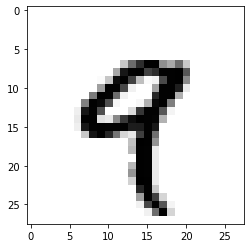

In [0]:
digit = train_images[4]                 # at 4th index image is 9
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()                              # To display image

In [0]:
train_labels[4]                           # Can also check through this

9

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

# read from right to left

# loads data and divides data into two parts (returns two tuple)
# 1) training data, 2) testing data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0     # Normalizing the data to reduce steps and increase compuatitonal power
test_images = test_images / 255.0             # Normalizing the test data

# method 2 to call network architecture
# passing three layers in sequential model
# Flatten() converts 2D, 3D dimension into 1-D (vector)
# Densely connected layer makes previous layers output, its input. [ so no input need]
# nn.relu (tensorflow..neuralnetwork.relu)
# 3rd layer has 10 OUTPUTS
# MOSTLY USE relu Activation FUNCTION [ IMP ]
# relu function , if 0 se greater value so return else agr 0 ya 0 se kam value ho to wo 0 kerdeta hy
# softmax function[ all numbers sum and returns their prob] and most repeated number is the class


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu) , 
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

# 2) Compilation STEP
# using optimizer Adam, or can also use RMS optimizer
# loss function because multiclassification
model.compile(optimizer = tf.keras.optimizers.Adam(),
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])

# 3) MODEL TRAINING STEP

model.fit(training_images, training_labels, epochs = 5, batch_size=128)

# 4) Model Evaluating Step
# model.evaluate tells the accuracy, performance of our MODEL
model_evaluate(test_images, test_labels)                                    # 0.8949 accuracy of our model


4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5061 - accuracy: 0.8226
Epoch 2/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3740 - accuracy: 0.8664
Epoch 3/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3342 - accuracy: 0.8791
Epoch 4/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3059 - accuracy: 0.8883
Epoch 5/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2901 - accuracy: 0.8939


NameError: ignored

In [0]:
# ON VIDEO 9 
# SOLVING REGRESSION PROBLEM BY PROVIDING THE HEIGHT and the MODEL will predict it's WEIGHT
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# To upload a file to google colab                             # run kero block then upload the damn file

import io
from google.colab import files
uploaded = files.upload()

df=pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
#df.head()                                                 # top 5 datas

Saving weight-height.csv to weight-height.csv


In [0]:
X = df[['Height']].values
y_true = df[['Weight']].values

In [0]:
def line(x, w=0, b=0):
  return w*x+b

def mean_squared_error(y_true, y_pred):           # finds diff between true value and predicted value 
  s=(y_true - y_pred) **2
  return np.sqrt(s.mean()) 

Text(0.5, 0, 'b')

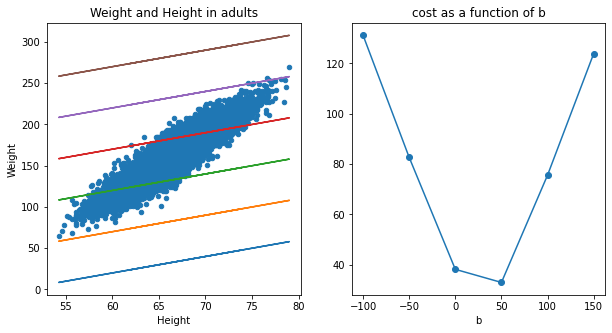

In [0]:
# Regression Problem And COST FUNCTION  Vid 9

plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

bs = np.array([-100,-50,0,50,100,150])
mses = []
for b in bs:
  y_pred = line(X, w=2, b=b)
  mse = mean_squared_error(y_true, y_pred)
  mses.append(mse)
  plt.plot(X, y_pred)

ax2 = plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

Linear Regression With Keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD   # SGD = Stoch Grad Descent

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
# To upload a file to google colab

from google.colab import files
uploaded = files.upload()                                 # run block and then put the .csv

import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()                                                 # top 5 datas

Saving weight-height.csv to weight-height (1).csv


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
df.head()                         # already loaded

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
X = df[['Height']].values
y_true = df[['Weight']].values

In [0]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [0]:
X.shape

(10000, 1)

In [0]:
# Training at simple sequential model
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

In [0]:
model.summary()   # tells how many parameteres used

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [0]:
# Model trained
model.fit(X, y_true, epochs=40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 86us/sample - loss: 850.8655
Epoch 2/40
10000/10000 [==============================] - 1s 71us/sample - loss: 538.5074
Epoch 3/40
10000/10000 [==============================] - 1s 63us/sample - loss: 502.4894
Epoch 4/40
10000/10000 [==============================] - 1s 75us/sample - loss: 457.1467
Epoch 5/40
10000/10000 [==============================] - 1s 68us/sample - loss: 429.3676
Epoch 6/40
10000/10000 [==============================] - 1s 71us/sample - loss: 386.9934
Epoch 7/40
10000/10000 [==============================] - 1s 66us/sample - loss: 341.5540
Epoch 8/40
10000/10000 [==============================] - 1s 65us/sample - loss: 309.1716
Epoch 9/40
10000/10000 [==============================] - 1s 64us/sample - loss: 275.5816
Epoch 10/40
10000/10000 [==============================] - 1s 68us/sample - loss: 257.7607
Epoch 11/40
10000/10000 [==============================] - 1s 69us/sample - 

In [0]:
y_pred = model.predict(X)
y_pred

array([[216.1388 ],
       [177.40808],
       [218.15057],
       ...,
       [139.83353],
       [179.33759],
       [125.12344]], dtype=float32)

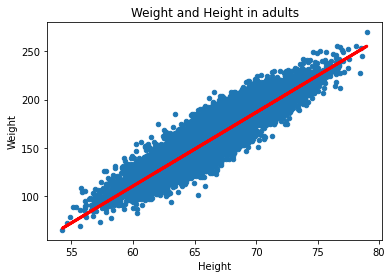

In [0]:
df.plot(kind = 'scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults')

plt.plot(X,y_pred,color = 'red', linewidth = 3)

# Machine found the line accurately on its own

In [0]:
w, b = model.get_weights()
w

array([[7.646568]], dtype=float32)

In [0]:
b

array([-348.5374], dtype=float32)

In [0]:
model.predict([[200]])                # Input height = 200, Output weight - 1220


array([[1220.6097]], dtype=float32)

In [0]:
model.predict([[152.4]])              # predicting height 5'11 = 152.4 cm,  weight = 847.1

array([[847.13525]], dtype=float32)

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1
